### Creating an image classifier able to find sneakers in instagram posts

The data comprises of few thousand images of sneakers collected using google images and instagram
and few thousand images of sneakers.    
Your goal is to use what you learned from previous examples and create a sneaker-not-sneaker binary classifier.

The task comprises of multiple sub-tasks that you need to do to build the classifier.

1. Create a dataset able to load data from new_meta_sneakers.csv
2. Create a fine tune binary classification architecture.
3. Create a training loop and train your model.

![title](static/sneakers.png)


### On the bottom of the following cell you see the data you will work with

In [11]:
%matplotlib inline
from torch import nn
import easyimages
import pandas as pd
import os
from torch.utils.data import Dataset, DataLoader
from pretrainedmodels.models import resnet50
from torchvision.transforms import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
import torch 
import pathlib
from imgaug import augmenters as iaa



DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


In [13]:
PATH_TO_SNEAKER_NOT_SNEAKER_DATASET = '/home/i008/small_sneaker_not_sneaker'
base_path = pathlib.Path(PATH_TO_SNEAKER_NOT_SNEAKER_DATASET)

classes = []
paths = []
for p in base_path.glob('*/*'):
    relative_path = p.relative_to(base_path)
    classes.append(str(relative_path.parent))
    paths.append(p)
    
df = pd.DataFrame({"tags": classes, "image_path": paths}).sample(frac=1).reset_index()
df.tags = df.tags.map({'sneaker': 1, 'nontsneaker': 0})
df.head()

# df[df.image_path.apply(str).str.contains('1238')].image_path.values

,index,tags,image_path
0,1530,0,/home/i008/small_sneaker_not_sneaker/nontsneak...
1,269,1,/home/i008/small_sneaker_not_sneaker/sneaker/8...
2,1512,0,/home/i008/small_sneaker_not_sneaker/nontsneak...
3,1703,0,/home/i008/small_sneaker_not_sneaker/nontsneak...
4,1679,0,/home/i008/small_sneaker_not_sneaker/nontsneak...


### Creating the torch Dataset.

First thing we need to do is create a dataset able to load our data. Since our metadata is stored in a csv file, our 
dataset should accept this file as a base source of what needs to be loaded.

Our dataset should also support augumentations and a "inference" mode wich disables them for predicting.


In [15]:
import PIL
from PIL import Image
import io
import requests
import torch
from torch.utils.data import Sampler


class OneClassImageClassificationDataset(Dataset):
    def __init__(self, annotations, image_transform):
        """
        annotations is a pandas dataframe
        
        """
        super().__init__()
        self.annotations = annotations
        self.image_transform = image_transform

    def __len__(self):
        """
        Return the length of the annotations dataframe
        """
        # your code here
        
        pass

    def __getitem__(self, index):
        """
        Using methods you wrote:
        1 - load image from disk for given index  (self.load_from_disk)
        2 - transform image (self.image_transform)
        3 - Load target (self.load_target)
        return Xi, yi
        """
        
        # YOUR CODE HERE
        
        pass



    def load_to_pil(self, uri):
        """
        Write a helper function that uses PIL.Image to load a file converts it to RGB and returns it (PIL.Image)
        """
        
        # YOUR CODE HERE
        
        pass



    def load_from_disk(self, index):
        """
        Loads an image from disk given a index.
        It gets the path of an image with the corresponding index from the metadata 
        It passes the URI to the self.load_to_pil and returns a PIL.Image
        """

        #image_path = # YOUR CODE HERE
        
        return self.load_to_pil(image_path)

    def load_target(self, index):
        """
        This function should get the tag for a given index from the annotations dataframe
        You .iloc can become useful.    
        This methods should return, either a 0 or a 1.
        """
        
        #label = # YOUR CODE HERE

        return label
    
    
class BaseSampler(Sampler):
    def __init__(self, df, n_samples):
        self.df = df
        self.n_samples = n_samples
        
    def __iter__(self):
        return iter(self._get_sample())
        
    def __len__(self):
        return self.n_samples
    
    def _get_sample(self):
        return np.random.choice(len(self.df), self.n_samples, replace=False)
        

def binary_classification_model():
    """
    Write a function that loads a resnet50 model from pretrainedmodels, freezes its layers
    replaces the last_linear with the proper output number. As we did in previous example.
    replace avgpool with adaptiv pooling.
    """    
    # model = YOUR CODE HERE
    return model



aug_seq = iaa.Sequential([
    iaa.Fliplr(p=0.5),
    iaa.Sometimes(
        0.3,
        iaa.Multiply((0.9, 1.2))
    ),
    iaa.Sometimes(
        0.3,
        iaa.AdditiveGaussianNoise()
    ),
    iaa.Affine(
        scale=(0.5, 2),
        translate_percent=(-0.2, 0.2)
    )
])
def augment(self, augmenter, image):
    augmenter = augmenter.to_deterministic()
    img_aug = augmenter.augment_image(np.array(image))
    img_aug = Image.fromarray(img_aug)
    return img_aug

In [18]:

def binary_classification_model():
    """
    Write a function that loads a resnet50 model from pretrainedmodels, freezes its layers
    replaces the last_linear with the proper output number. As we did in previous example.
    replace avgpool with adaptiv pooling.
    """

    # model = YOUR CODE HERE
    return model

# YOUR CODE HERE:
# SPLIT the dataframe into df_train, df_test (thing about using sklearn.model_selection.train_test_split)
df_train = 
df_test = 

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
N_EPOCHS = 10
BATCH_SIZE = 32
IMAGE_SIZE = 256

image_transform_train = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)])

# YOUR CODE define image_transform_test
image_transform_test =

# YOUR CODE define the crieterion
criterion = 

net = binary_classification_model()

optimizer = torch.optim.Adam(net.parameters(), lr=0.005)


# YOUR CODE
# Instantiate the OneClassImageClassificationDatasets

# initialize the BaseSampler
bs =

#YOUR CODE
#Initialize your DataLoader (using datasets)
train_dl = 
test_dl = 

SyntaxError: invalid syntax (<ipython-input-18-4f7b8c5a1c96>, line 8)

In [21]:
def evaluate_model(model, loader, print_info=False):
    with torch.no_grad():
        model.eval()
        collect_results = []
        collect_target = []
        for batch in loader:
            X, y = batch
            X = X.to(DEVICE)
            y = y.to(DEVICE).detach().cpu().numpy()
            pred = model(X)
            collect_results.append(pred.sigmoid().detach().cpu().numpy())
            collect_target.append(y) 
            
    
        preds_proba = np.concatenate(collect_results)
        preds = preds_proba.argmax(axis=1)
        
        targets = np.concatenate(collect_target)

        ll = log_loss(targets, preds_proba)
        acc = accuracy_score(targets, preds)
        if print_info:
            print("test log-loss: {}".format(ll))
            print("overall accuracy:  {}".format(acc))
            #print(classification_report(targets, preds))
        model.train()
        
        return ll, acc
    
metrics = []
metrics_names = ['loss_train','loss_test','acc_train','acc_test']
losses = []
net.to(DEVICE)

for epoch in range(N_EPOCHS):
    for X, y in train_dl:
        X = X.to(DEVICE)
        y = y.to(DEVICE)
        optimizer.zero_grad()
        ypred=net(X)
        loss = criterion(ypred, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.detach().cpu().numpy())
        
    testll, testacc = evaluate_model(net, test_dl)
    trainll, trainacc = evaluate_model(net, train_dl)
    print("test: loss={} acc={}".format(testll, testacc))
    print("train: loss={} acc={}".format(trainll, trainacc))
    metrics.append([trainll, testll, trainacc, testacc])
        

test: loss=0.41847528640180826 acc=0.895
train: loss=0.4318796574659646 acc=0.869
test: loss=0.37429349126294253 acc=0.89
train: loss=0.3990470486860722 acc=0.874
test: loss=0.34485713228583337 acc=0.91
train: loss=0.3620819819243625 acc=0.896
test: loss=0.3433430520445108 acc=0.9
train: loss=0.34871743017993867 acc=0.901
test: loss=0.34362930625677107 acc=0.9
train: loss=0.3490812131818384 acc=0.892
test: loss=0.33231457209214565 acc=0.9
train: loss=0.3403089677542448 acc=0.897
test: loss=0.33013540908694267 acc=0.905
train: loss=0.33818462532153354 acc=0.897
test: loss=0.3220250415056944 acc=0.905
train: loss=0.3242507793321274 acc=0.897
test: loss=0.3217039716802537 acc=0.915
train: loss=0.33467055126093326 acc=0.893
test: loss=0.3222175748459995 acc=0.91
train: loss=0.34573394981608724 acc=0.887
test: loss=0.32963674501515927 acc=0.895
train: loss=0.3385035211984068 acc=0.889
test: loss=0.3385161824245006 acc=0.885
train: loss=0.3423905228693038 acc=0.874
test: loss=0.3151289746537

KeyboardInterrupt: 

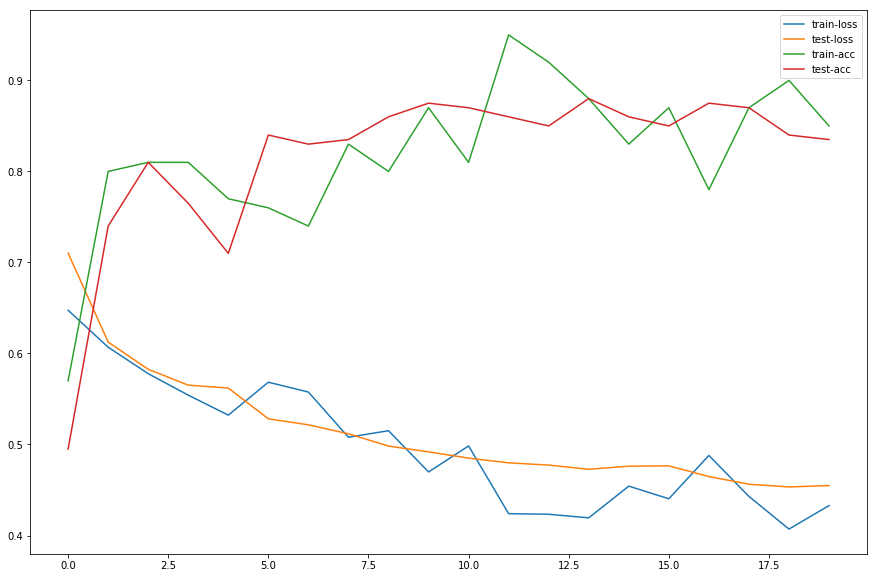

In [24]:
# plt.figure(figsize=(15,10))
pd.DataFrame(metrics, columns=['train-loss','test-loss','train-acc','test-acc']).plot(subplots=False, figsize=(15,10))

###  Exercises

1) Write a different Sampler for example one that will oversample the sneaker class by a factor of 3.